# Synthetic Financial Datasets For Fraud Detection


## Synthetic Financial Datasets : An Overview

Ever since the advent of internet the digital revolution has rising and has creeped into all aspects to our lives. One of the most important digital revolution happend in financial system and especially transacting money to someone from any part of the world digitally. Digital transactions have become a part of daily life like purchasing a product online, sending money to friends, depositing cash in bank account, investment purposes etc., They had a lot of benefits so does paved way for fradulent activities. People started using digital money transactions medium to launder money and make the money look like it comes from a legal source. This dataset (https://www.kaggle.com/ealaxi/paysim1) is presently only one of four on Kaggle with information on the rising risk of digital financial fraud, emphasizing the difficulty in obtaining such data.

## Problem statement


The main technical challenge it poses to predicting fraud is the highly imbalanced distribution between positive and negative classes in 6 million rows of data. Another stumbling block to the utility of this data stems from the possible discrepancies in its description.



## Headers


* **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).


* **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.


* **amount** - amount of the transaction in local currency.


* **nameOrig** - customer who started the transaction


* **oldbalanceOrg** - initial balance before the transaction


* **newbalanceOrig** - new balance after the transaction


* **nameDest** - customer who is the recipient of the transaction


* **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).


* **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).


* **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.


* **isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.


## Goals


* Exploratory analysis of data to extract the pattern of fraudlent activites.

* Build a machine learning model to classify fraud and non-fraud transactions.

* Reduce the false negatives by tuning the model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,classification_report,roc_auc_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
df = pd.read_csv("/Users/nouf/Desktop/Synthetic-Financial-Datasets-For-Fraud-Detection/PS_20174392719_1491204439457_log.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Taking Sample

In [5]:
from sklearn.model_selection import train_test_split

df_sample, _ = train_test_split(df, test_size=0.92141601,random_state=1234, stratify=df["isFraud"]) 

#0.92141601 to take 500000 sample 

In [6]:
df_sample.shape

(500000, 11)

# Train - Test Split

In [7]:
df_train, df_test = train_test_split(df_sample, test_size=0.2,random_state=123,stratify=df_sample["isFraud"])
df_train, df_val = train_test_split(df_train, test_size=0.25,random_state=123,stratify=df_train["isFraud"])

In [8]:
df_train.shape

(300000, 11)

In [9]:
df_test.shape

(100000, 11)

In [10]:
df_val.shape

(100000, 11)

# EDA

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 486548 to 4214666
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            300000 non-null  int64  
 1   type            300000 non-null  object 
 2   amount          300000 non-null  float64
 3   nameOrig        300000 non-null  object 
 4   oldbalanceOrg   300000 non-null  float64
 5   newbalanceOrig  300000 non-null  float64
 6   nameDest        300000 non-null  object 
 7   oldbalanceDest  300000 non-null  float64
 8   newbalanceDest  300000 non-null  float64
 9   isFraud         300000 non-null  int64  
 10  isFlaggedFraud  300000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 27.5+ MB


In [12]:
df_train.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
#Drop Duplicates

df_train.drop_duplicates(keep=False, inplace=True)

In [14]:
df_train.shape

(300000, 11)

In [15]:
df_train.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,300000.000000,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,300000.000000,300000.000000
mean,243.518963,1.797030e+05,8.336019e+05,8.549314e+05,1.097957e+06,1.221330e+06,0.001290,0.000003
std,141.901298,6.022078e+05,2.895000e+06,2.930307e+06,3.346001e+06,3.621448e+06,0.035893,0.001826
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.324180e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.426901e+04,1.392974e+04,0.000000e+00,1.305861e+05,2.120638e+05,0.000000,0.000000
75%,334.000000,2.077247e+05,1.068955e+05,1.439608e+05,9.426017e+05,1.111275e+06,0.000000,0.000000
max,742.000000,5.512957e+07,3.741827e+07,3.498450e+07,3.114049e+08,3.114929e+08,1.000000,1.000000


### 1 - isFraud

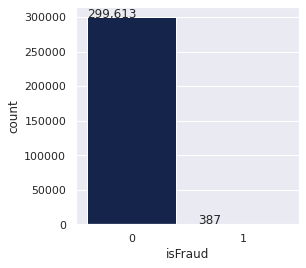

In [16]:
plt.figure(figsize=(4,4))
df_train['isFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFraud", data=df_train,color = "#0c2054" )
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')),
            (p.get_x(), p.get_height()))

isFraud Column shows that the classes are imbalanced

### 2 - isFlaggedFraud

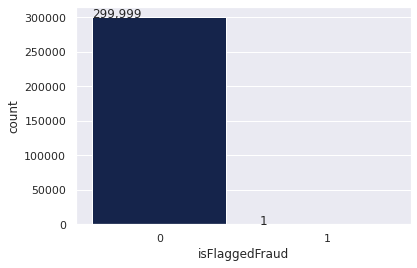

In [17]:
df_train['isFlaggedFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFlaggedFraud", data=df_train,color = "#0c2054")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

### 3- Type

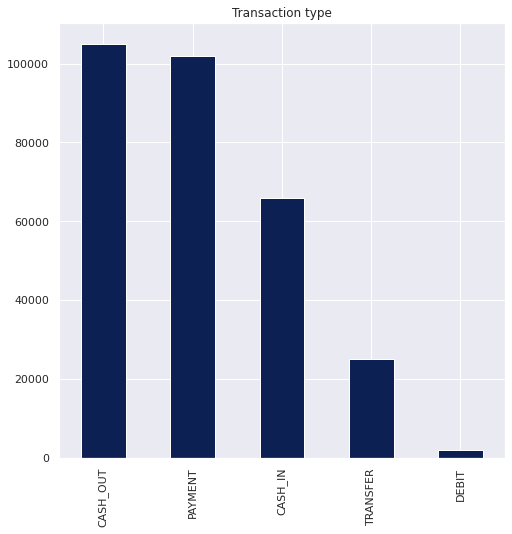

In [18]:
f, ax = plt.subplots(1, 1, figsize=(4, 4))
df_train.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8),color = "#0c2054")
plt.ticklabel_format(style='plain', axis='y')

In [19]:
pd.crosstab(df_train['type'], df_train['isFraud'])

isFraud,0,1
type,,
CASH_IN,65987,0
CASH_OUT,104850,192
DEBIT,1955,0
PAYMENT,101920,0
TRANSFER,24901,195


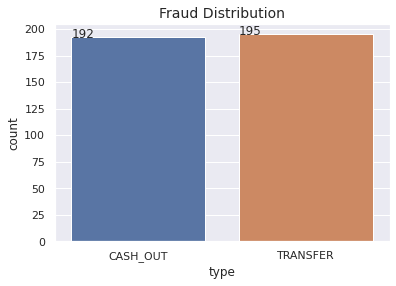

In [20]:
ax=sns.countplot('type', data=df_train[(df_train['isFraud'] == 1)])
plt.title('Fraud Distribution', fontsize=14)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

plt.show()


We find that of the five types of transactions, fraud occurs only in two of them 'TRANSFER' where money is sent to a customer / fraudster and 'CASH_OUT' where money is sent to a merchant who pays the customer / fraudster in cash. Remarkably, the number of fraudulent TRANSFERs almost equals the number of fraudulent CASH_OUTs . 

### 4 - Step

In [21]:
fraud = df_train[df_train["isFraud"] == 1]
Notfraud = df_train[df_train["isFraud"] == 0]

In [22]:
Notfraud['transactionHour'] = Notfraud['step'] % 24
fraud['transactionHour'] = fraud['step'] % 24

# Distribution of not fraud

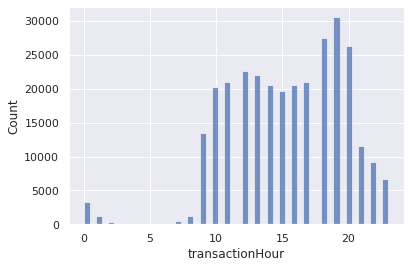

In [23]:
sns.histplot(data = Notfraud
            ,x = 'transactionHour'
            ,bins=50
            );

# Distribution of fraud

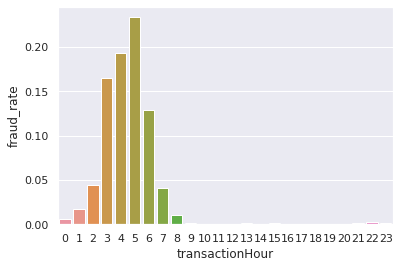

In [24]:
df_train['transactionHour'] = df_train['step'] % 24
frauds_hour = pd.concat([df_train.groupby("transactionHour")["isFraud"].sum(),df_train.groupby("transactionHour")["isFraud"].count()],axis=1)
frauds_hour.columns = ["Frauds","Transactions"]
frauds_hour["fraud_rate"] = frauds_hour.Frauds/frauds_hour.Transactions
sns.barplot(x=frauds_hour.index,y=frauds_hour.fraud_rate)
plt.show()

Another analysis that can be interesting is at which hour of a day, the fraud attacks generally happen. From the step variable, we can get the hour of day. The below plot shows the frauds at different hours of day. It tells that frauds happen during sleeping hours the most. Close to 20% of transactions that happen during 4 AM and 5 AM are fraud transactions.

In [25]:
# converting into object type
df_train['transactionHour'] = df_train['transactionHour'].astype('object')

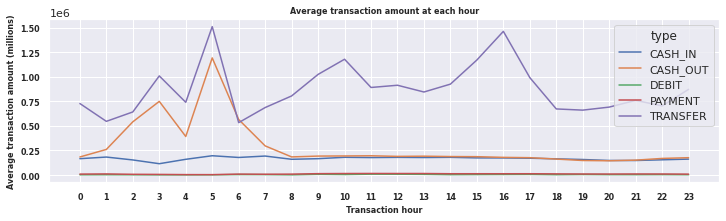

In [26]:
# avg. transaction amount at each hour for each transaction type
plt.figure(figsize=(12,3))
sns.lineplot(data=df_train.groupby(['transactionHour','type']).agg({'amount' : 'mean'}).round(2).reset_index(),
             x='transactionHour',
             y='amount',
             hue='type')
plt.xlabel('Transaction hour', fontsize=8, fontweight='bold')
plt.xticks(range(24), range(24),fontsize=8, fontweight='bold', rotation=0)
plt.ylabel('Average transaction amount (millions)', fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.title('Average transaction amount at each hour', fontsize=8, fontweight='bold')
plt.show()


Text(0.5, 1.0, 'Amount vs Balance')

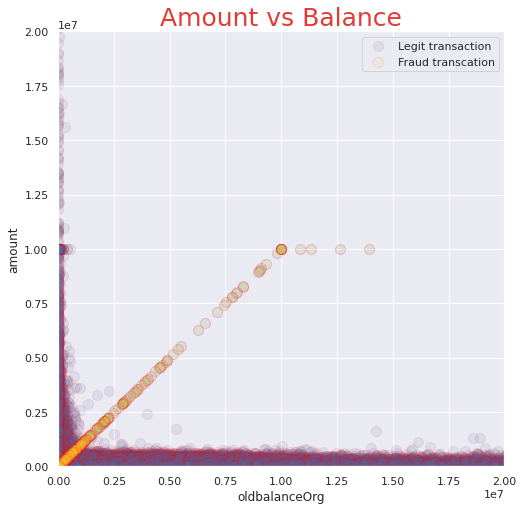

In [27]:
newscatplot=df_train[df_train['isFraud']==1]
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.set_ylim(0,2*1e7)
ax.set_xlim(0,2*1e7)
df_train.plot.scatter(x='oldbalanceOrg',y='amount', ax=ax,edgecolors='red',s=100,alpha=0.1,label="Legit transaction")
newscatplot.plot.scatter(x='oldbalanceOrg',y='amount', color='#FCD735', ax=ax,edgecolors='red',s=100,alpha=0.1,label="Fraud transcation")
plt.title('Amount vs Balance',fontsize=25,color='#E43A36')


The above figure represents the illegal money and how to increase it until it reaches the permissible limit of transfers per day and then stops (example) The permissible limit of transfers per day is $50 at this amount, the customer cannot transfer more than this balance until 24 hours are completed

# Feature engineering 

In [28]:
df_train = df_train.loc[(df_train.type == 'TRANSFER') | (df_train.type == 'CASH_OUT')]

In [29]:
df_train["errorbalanceOrg"] = df_train.newbalanceOrig + df_train.amount - df_train.oldbalanceOrg
df_train["errorbalanceDest"] = df_train.oldbalanceDest + df_train.amount - df_train.newbalanceDest

As seen earlier, 0 values of oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest when amount is not 0 have a good chance of fraudulent transaction, we will create new freatures combining (oldbalanceOrg,newbalanceOrig,amount) and (oldbalanceDest,newbalanceDest,amount)


# Base line

In [30]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['type'], prefix='type')],axis=1) 

In [31]:
df_train = df_train.drop(['nameOrig', 'nameDest', 'isFlaggedFraud',"type","transactionHour"], axis = 1)

In [32]:
y_train = df_train["isFraud"]
X_train = df_train.drop(['isFraud'],axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Val

In [34]:
df_val = df_val.loc[(df_val.type == 'TRANSFER') | (df_val.type == 'CASH_OUT')]

df_val["errorbalanceOrg"] = df_val.newbalanceOrig + df_val.amount - df_val.oldbalanceOrg
df_val["errorbalanceDest"] = df_val.oldbalanceDest + df_val.amount - df_val.newbalanceDest

df_val = pd.concat([df_val, pd.get_dummies(df_val['type'], prefix='type')],axis=1) 

df_val = df_val.drop(['nameOrig', 'nameDest', 'isFlaggedFraud',"type"], axis = 1)

In [35]:
y_val = df_val["isFraud"]
X_val= df_val.drop(['isFraud'],axis=1)

# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
from sklearn.metrics import confusion_matrix

# Train

In [38]:
RF = RandomForestClassifier(random_state=1)

RF.fit(X_train, y_train)

y_predict = RF.predict(X_train)

# evaluate the model
print(classification_report(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129751
           1       1.00      1.00      1.00       387

    accuracy                           1.00    130138
   macro avg       1.00      1.00      1.00    130138
weighted avg       1.00      1.00      1.00    130138

[[129751      0]
 [     0    387]]


# Val

In [39]:
RF = RandomForestClassifier(random_state=1)

RF.fit(X_train, y_train)

y_predict = RF.predict(X_val)

# evaluate the model
print(classification_report(y_val, y_predict))
print(confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43179
           1       1.00      1.00      1.00       129

    accuracy                           1.00     43308
   macro avg       1.00      1.00      1.00     43308
weighted avg       1.00      1.00      1.00     43308

[[43179     0]
 [    0   129]]


# Test

In [40]:
df_test = df_test.loc[(df_test.type == 'TRANSFER') | (df_test.type == 'CASH_OUT')]

df_test["errorbalanceOrg"] = df_test.newbalanceOrig + df_test.amount - df_test.oldbalanceOrg
df_test["errorbalanceDest"] = df_test.oldbalanceDest + df_test.amount - df_test.newbalanceDest

df_test = pd.concat([df_test, pd.get_dummies(df_test['type'], prefix='type')],axis=1) 

df_test = df_test.drop(['nameOrig', 'nameDest', 'isFlaggedFraud',"type"], axis = 1)

In [41]:
y_test = df_test["isFraud"]
X_test = df_test.drop(['isFraud'],axis=1)

In [42]:
RF = RandomForestClassifier(random_state=1)

RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43235
           1       1.00      0.99      1.00       129

    accuracy                           1.00     43364
   macro avg       1.00      1.00      1.00     43364
weighted avg       1.00      1.00      1.00     43364

[[43235     0]
 [    1   128]]


We can see that accuracy in train and test is 100% and this is because the data is manufactured.